<a href="https://colab.research.google.com/github/WanatchapornS/Data-Preparation-Data-Mining/blob/main/Data102_(Chapter_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://github.com/tohnperfect/DPDM2021

In [ ]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง

In [ ]:
import os # จัดการไฟล์และ path

In [ ]:
os.getcwd()

'/Users/pitchayaw/Desktop/TeachingKKU/DP&DM/codes/notebooks'

In [ ]:
path = os.getcwd()

#### 1 Eyeball the data

In [ ]:
data = pd.read_csv(path+'/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


NaN คือ Not a Number

In [ ]:
dataN = data.iloc[1:,:3]  #.iloc[แถว,หลัก]
dataN

,Pregnancies,Glucose,BloodPressure
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
5,5,116,74
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


head() tail()

In [ ]:
dataN.head()

,Pregnancies,Glucose,BloodPressure
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
5,5,116,74


In [ ]:
dataN.tail()

,Pregnancies,Glucose,BloodPressure
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60
767,1,93,70


In [ ]:
dataN.head(20)

,Pregnancies,Glucose,BloodPressure
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
5,5,116,74
6,3,78,50
7,10,115,0
8,2,197,70
9,8,125,96
10,4,110,92


In [ ]:
dataN.tail(20)

,Pregnancies,Glucose,BloodPressure
748,3,187,70
749,6,162,62
750,4,136,70
751,1,121,78
752,3,108,62
753,0,181,88
754,8,154,78
755,1,128,88
756,7,137,90
757,0,123,72


#### 2 Statical Description

In [ ]:
dataN.describe()

,Pregnancies,Glucose,BloodPressure
count,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695
std,3.370877,31.978468,19.368155
min,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000
50%,3.000000,117.000000,72.000000
75%,6.000000,140.000000,80.000000
max,17.000000,199.000000,122.000000


เปลี่ยนจำนวนตั้งครรภ์ หากมากกว่า 10 ครั้งให้เป็นค่าสูญหาย

In [ ]:
dataN['Pregnancies'][dataN['Pregnancies']>10] = np.nan

In [ ]:
dataN.describe()

,Pregnancies,Glucose,BloodPressure
count,733.000000,767.000000,767.000000
mean,3.448840,120.859192,69.101695
std,2.883278,31.978468,19.368155
min,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000
50%,3.000000,117.000000,72.000000
75%,6.000000,140.000000,80.000000
max,10.000000,199.000000,122.000000


เปลี่ยนค่า Glucose และ BloodPressure ที่มีค่าเป็นศูนย์ให้เป็นค่าสูญหาย

In [ ]:
dataN['Glucose'][dataN['Glucose'] == 0] = np.nan
dataN['BloodPressure'][dataN['BloodPressure'] == 0] = np.nan

In [ ]:
dataN.describe()

,Pregnancies,Glucose,BloodPressure
count,733.000000,762.000000,732.000000
mean,3.448840,121.652231,72.405738
std,2.883278,30.540786,12.390616
min,0.000000,44.000000,24.000000
25%,1.000000,99.000000,64.000000
50%,3.000000,117.000000,72.000000
75%,6.000000,140.750000,80.000000
max,10.000000,199.000000,122.000000


#### 3 Boxplot

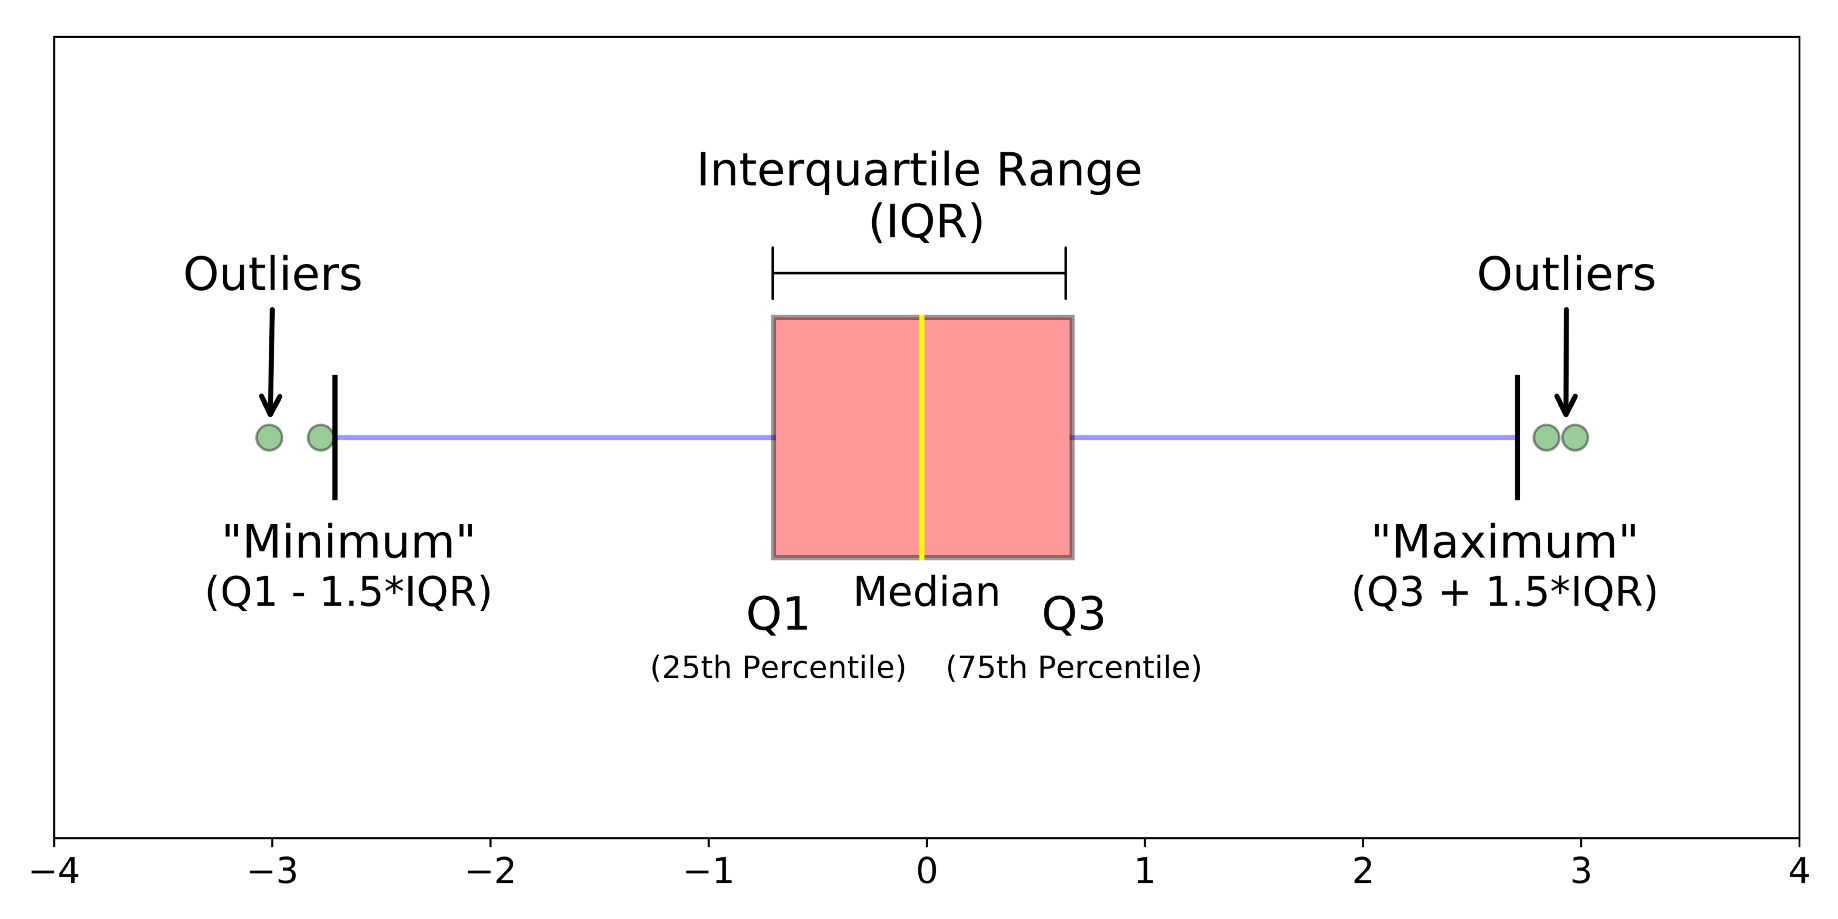

In [ ]:
from matplotlib import pyplot as plt #ใช้วาดกราฟ

In [ ]:
data.iloc[:,1]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [ ]:
dataN['Glucose']

1       85.0
2      183.0
3       89.0
4      137.0
5      116.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 767, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc07d1c2670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc07d1c2d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc07d1c2310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc07d1cf4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc07d1cf880>],
 'means': []}

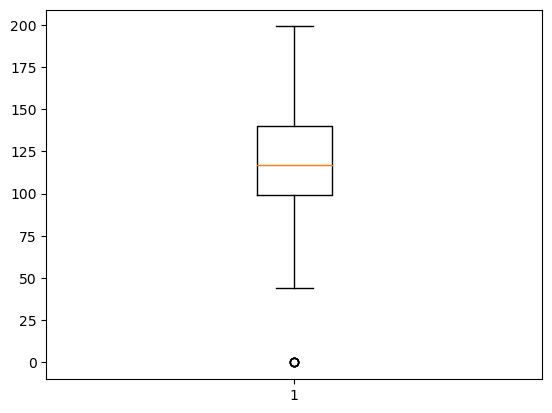

In [ ]:
plt.boxplot(data.iloc[:,1])

# Data Visualization

* package ```matplotlib```
* Boxplot
* Scatter plot
* Plot
* Barchart
* Histogram

## Boxplot

In [ ]:
dataN['Glucose'].describe()

count    762.000000
mean     121.652231
std       30.540786
min       44.000000
25%       99.000000
50%      117.000000
75%      140.750000
max      199.000000
Name: Glucose, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc04a6d0460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc04a6d0b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc04a6d01c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc04a6da2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc04a6da640>],
 'means': []}

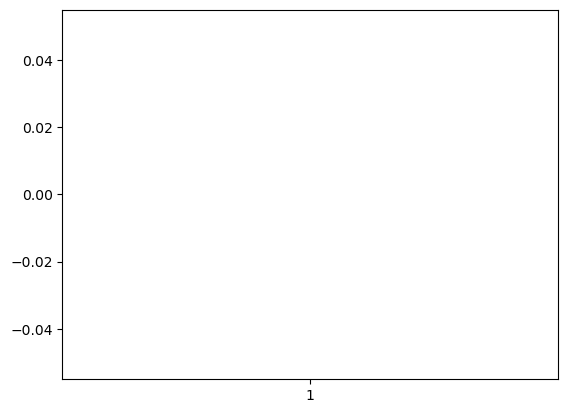

In [ ]:
plt.boxplot(dataN['Glucose'])

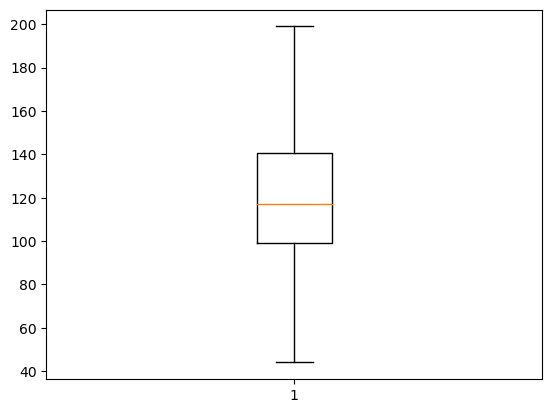

In [ ]:
bxp_output = plt.boxplot(dataN['Glucose'].dropna())

In [ ]:
bxp_output

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0693d0910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0693de070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0693d0580>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0693de790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0693deb20>],
 'means': []}

In [ ]:
bxp_output['boxes']

In [ ]:
bxp_output['caps']

In [ ]:
bxp_output['boxes'][0]

In [ ]:
bxp_output['boxes'][0].get_ydata()

array([ 99.  ,  99.  , 140.75, 140.75,  99.  ])

In [ ]:
bxp_output['boxes'][0].get_ydata()[0]

99.0

In [ ]:
bxp_output['boxes'][0].get_xdata() #เราไม่สนใจเพราะเราวาดแนวแกนตั้ง

array([0.925, 1.075, 1.075, 0.925, 0.925])

In [ ]:
bxp_output['caps'][0].get_ydata()

array([44., 44.])

In [ ]:
bxp_output['caps'][1].get_ydata()

array([199., 199.])

In [ ]:
bxp_output['fliers'][0].get_ydata()

array([], dtype=float64)

In [ ]:
bxp_output['fliers'][0].get_ydata().shape

(0,)

In [ ]:
bxp_output['medians'][0].get_ydata()

array([117., 117.])

In [ ]:
iqr = bxp_output['boxes'][0].get_ydata()[3]-bxp_output['boxes'][0].get_ydata()[0]

In [ ]:
iqr

41.75

### Quiz 7

เขียนฟังก์ชั่น คำนวณ หา Q1,Q2,Q3,IQR โดยรับ input เป็น output ของ boxplot และแกนของ boxplot

``` python
    def box_vals(box_out_dict,vert = True):
        #your code
        return q1,q2,q3,iqr
```





In [ ]:
def box_vals(box_out_dict, vert = True):
    if vert ==True:
        Q1=box_out_dict['boxes'][0].get_ydata()[0] # Findind Q1
        Q2=bxp_output['medians'][0].get_ydata()[0] # Findind Q2
        Q3=box_out_dict['boxes'][0].get_ydata()[3] # Findind Q3
        IQR = Q3- Q1 # Findind IQR
    else:
        Q1=box_out_dict['boxes'][0].get_xdata()[0]
        Q2=bxp_output['medians'][0].get_xdata()[0]
        Q3=box_out_dict['boxes'][0].get_xdata()[3]
        IQR = Q3- Q1
    return Q1, Q2, Q3, IQR

(99.0, 117.0, 140.75, 41.75)

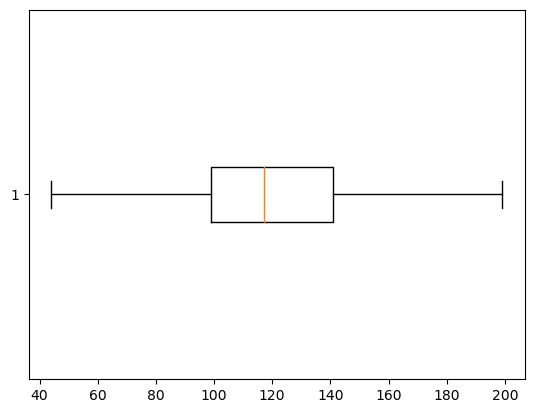

In [ ]:
bxp_output = plt.boxplot(dataN['Glucose'].dropna(),vert=False)
# checking function
box_vals(bxp_output, vert = False)

(99.0, 117.0, 140.75, 41.75)

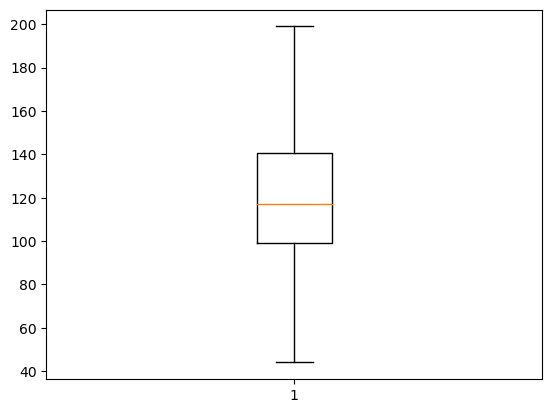

In [ ]:
bxp_output = plt.boxplot(dataN['Glucose'].dropna())
# checking function
box_vals(bxp_output)

## Plot

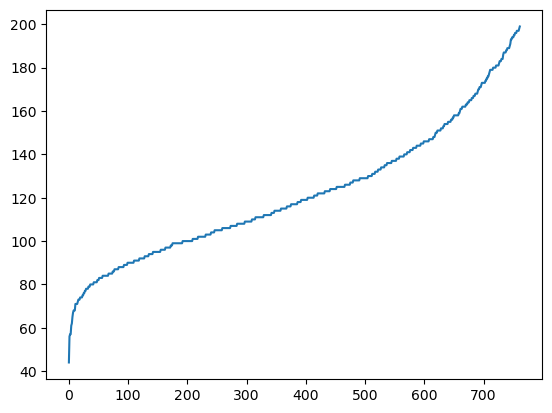

In [ ]:
plt.plot(np.sort(dataN['Glucose']))

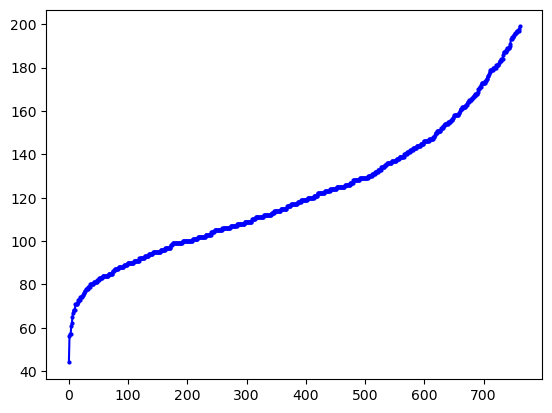

In [ ]:
plt.plot(np.sort(dataN['Glucose']),'o-b',markersize=2)

## Scatter Plot

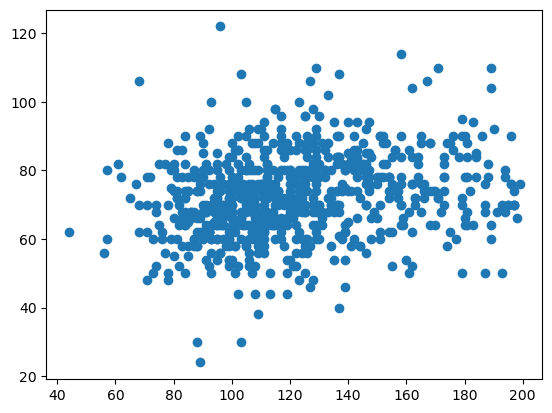

In [ ]:
plt.scatter(dataN['Glucose'],dataN['BloodPressure'])

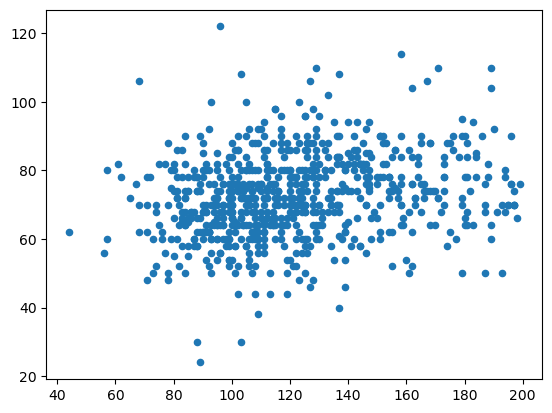

In [ ]:
plt.scatter(dataN['Glucose'],dataN['BloodPressure'],s=20)

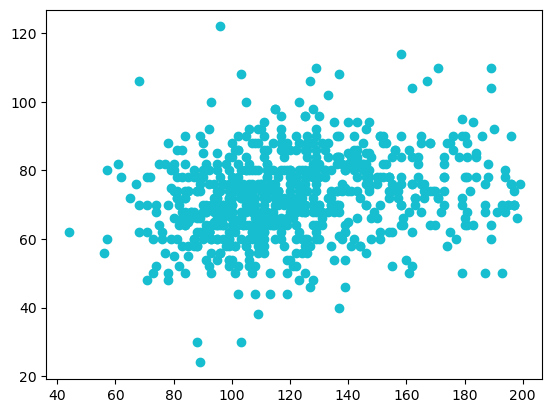

In [ ]:
plt.scatter(dataN['Glucose'],dataN['BloodPressure'],c='#17becf')

In [ ]:
x = [10, 13, 16, 20]
y = [5, 2, 7, 1]
z = [10, 2, 5, 8]

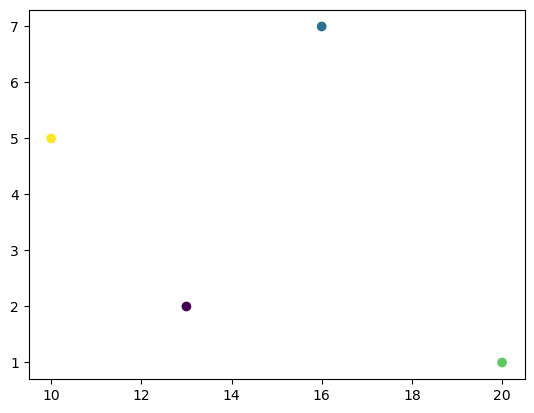

In [ ]:
plt.scatter(x,y,c=z)

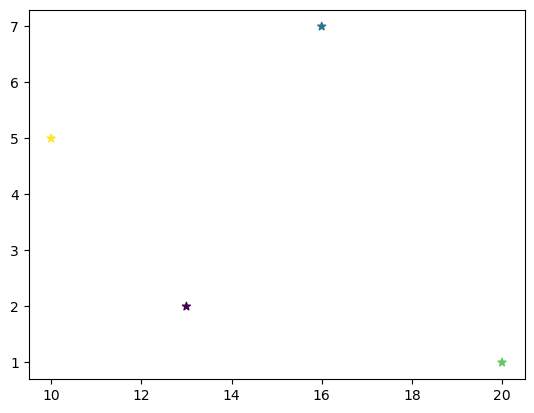

In [ ]:
plt.scatter(x,y,c=z,marker='*')

## Barchart

### stacked barchart
https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

In [ ]:
data

[[66386, 174296, 75131, 577908, 32015],
 [58230, 381139, 78045, 99308, 160454],
 [89135, 80552, 152558, 497981, 603535],
 [78415, 81858, 150656, 193263, 69638],
 [139361, 331509, 343164, 781380, 52269]]

In [ ]:
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

In [ ]:
rows

['100 year', '50 year', '20 year', '10 year', '5 year']

In [ ]:
values = np.arange(0, 2500, 500)
value_increment = 1000

In [ ]:
values

array([   0,  500, 1000, 1500, 2000])

In [ ]:
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

In [ ]:
index

array([0.3, 1.3, 2.3, 3.3, 4.3])

In [ ]:
colors

array([[0.96862745, 0.98823529, 0.99215686, 1.        ],
       [0.87792388, 0.92510573, 0.95664744, 1.        ],
       [0.74800461, 0.82674356, 0.9015917 , 1.        ],
       [0.61877739, 0.73550173, 0.85397924, 1.        ],
       [0.54901961, 0.58559016, 0.77517878, 1.        ]])

In [ ]:
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

In [ ]:
y_offset

array([0., 0., 0., 0., 0.])

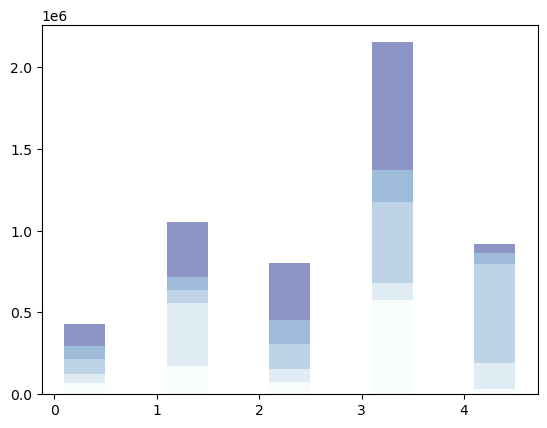

In [ ]:
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

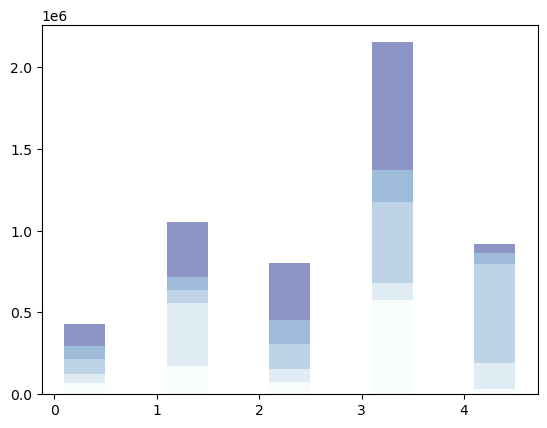

In [ ]:
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

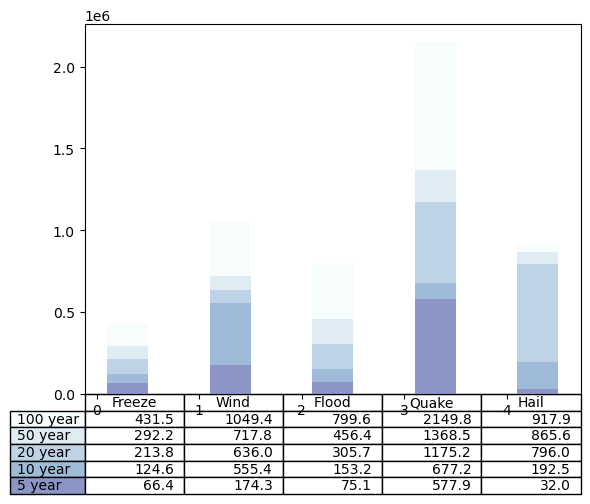

In [ ]:
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

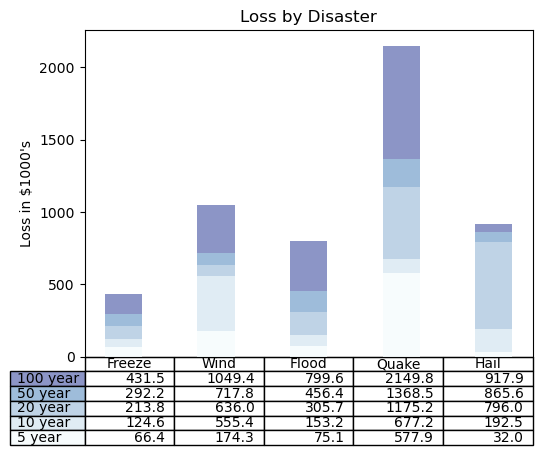

In [ ]:
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [ ]:
data

[[66386, 174296, 75131, 577908, 32015],
 [58230, 381139, 78045, 99308, 160454],
 [89135, 80552, 152558, 497981, 603535],
 [78415, 81858, 150656, 193263, 69638],
 [139361, 331509, 343164, 781380, 52269]]

In [ ]:
colors = colors[::-1]

<BarContainer object of 5 artists>

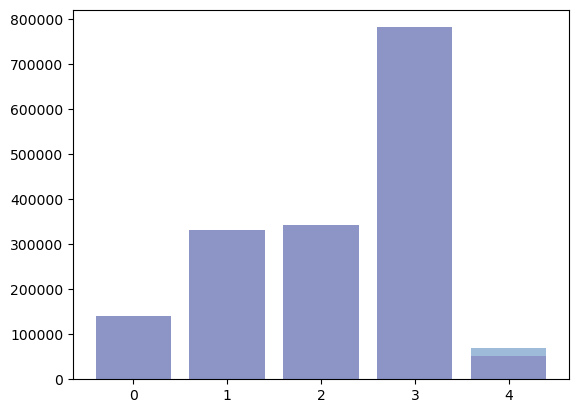

In [ ]:
plt.bar(range(5),data[3],color=colors[3])
plt.bar(range(5),data[4],color=colors[4])

<BarContainer object of 5 artists>

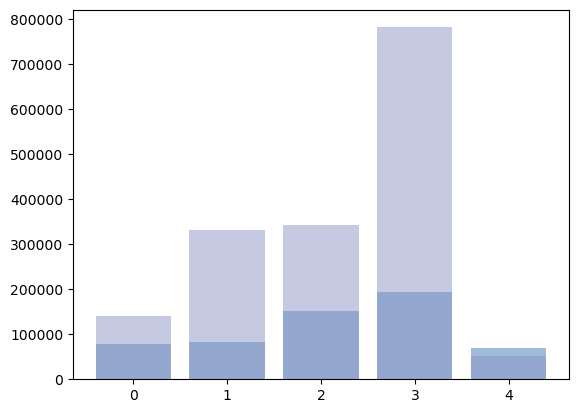

In [ ]:
plt.bar(range(5),data[3],color=colors[3])
plt.bar(range(5),data[4],color=[0.54901961, 0.58559016, 0.77517878, 0.5        ])

<BarContainer object of 2 artists>

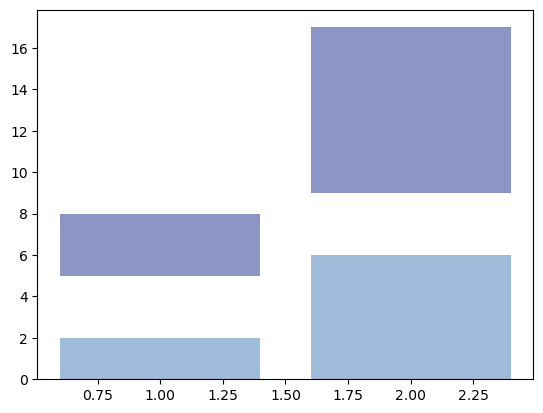

In [ ]:
plt.bar([1,2],[2,6],color=colors[3])
plt.bar([1,2],[3,8],color=colors[4],bottom=[5,9])

### Grouped barchart
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

In [ ]:
x

array([0, 1, 2, 3, 4])

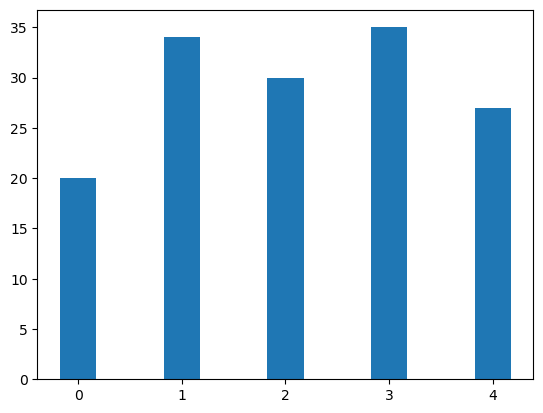

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x, men_means, width, label='Men')

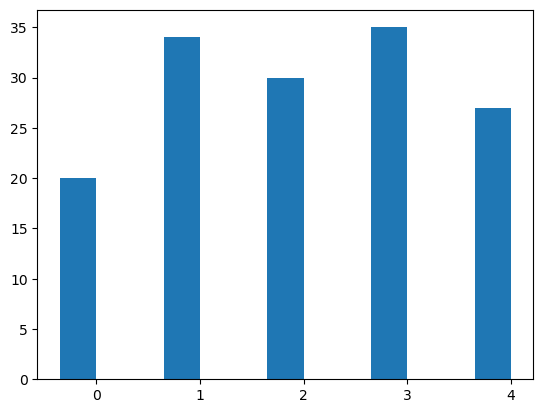

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-(width/2), men_means, width, label='Men')

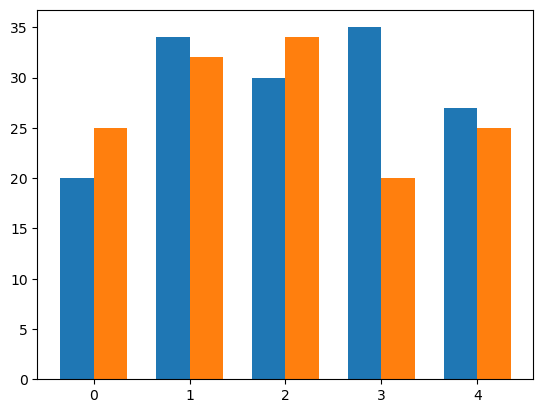

In [ ]:
rects1 = plt.bar(x - width/2, men_means, width, label='Men')
rects2 = plt.bar(x + width/2, women_means, width, label='Women')

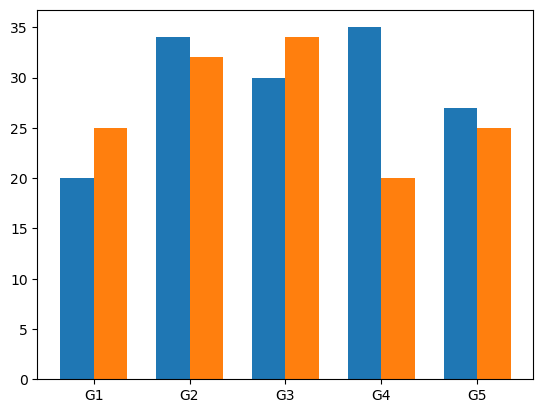

In [ ]:
rects1 = plt.bar(x - width/2, men_means, width, label='Men')
rects2 = plt.bar(x + width/2, women_means, width, label='Women')
plt.xticks(x,labels);

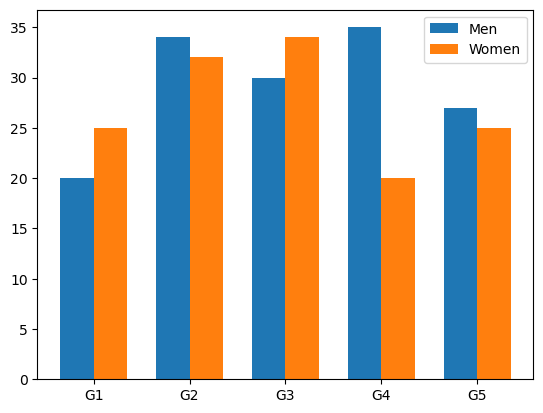

In [ ]:
rects1 = plt.bar(x - width/2, men_means, width, label='Men')
rects2 = plt.bar(x + width/2, women_means, width, label='Women')
plt.legend()
plt.xticks(x,labels);

## Histogram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(6)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)  # randn จะสุ่มค่าจาก normal dist ที่มี mu=0 sigma=1

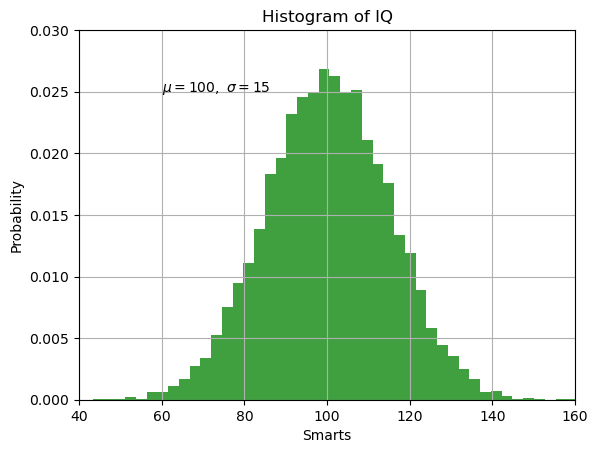

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [ ]:
np.random.seed(6)
xn = np.random.randn(10)
xn

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ])

(array([4., 6.]),
 array([-2.48678065, -0.42374478,  1.63929108]),
 <BarContainer object of 2 artists>)

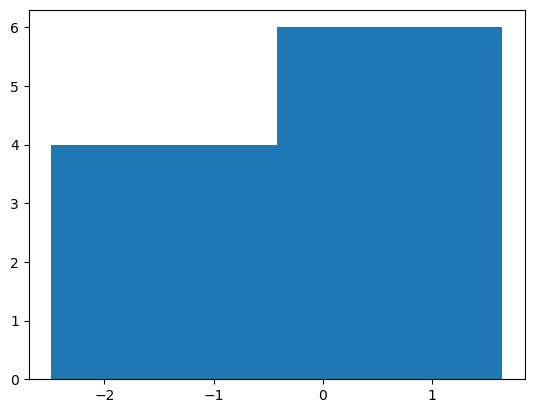

In [ ]:
plt.hist(xn,2)

### HW

ให้ plot stacked barchart และ grouped barchart
ของข้อมูลต่อไปนี้
และอธิบาย

```
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
notsure_means = [10,37,38,14,22]
```

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
notsure_means = [10, 37, 38, 14, 22]

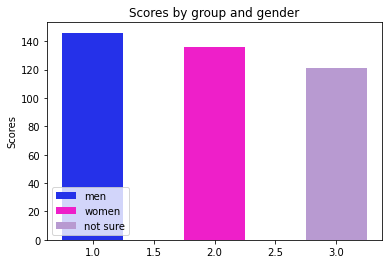

In [ ]:
width = 0.5  #กำหนดความกว้างหรือความหนาของแท่ง
plt.bar([1], np.sum(men_means), width, color ='#2531E9', label = 'men') #plot labels : men_means, เริ่ม plot เเท่งจาก 0
plt.bar([2], np.sum(women_means), width,  color ='#EE1FC9', label = 'women') #plot labels : women_means, เริ่ม plot เเท่งต่อจากค่าของ men_means
plt.bar([3], np.sum(notsure_means), width,  color ='#B89AD1', label = 'not sure')
#อธิบาย line 4 plot labels : notsure_means, เริ่ม plot เเท่งต่อจากค่าของ men_means+women_means
plt.ylabel('Scores') # ตั้งชื่อ แกน y
plt.title('Scores by group and gender') #ตั้งชื่อกราฟ
plt.legend(loc = 'lower left'); #เพื่อให้กราฟแสดง label ที่ขอบขวาบนของกราฟ

plt.show() #ประกาศเพื่อเเสดงกราฟ

In [ ]:
np.random.choice(['kie','nicha','oil','oil'])

'oil'